<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/TICTACTOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Veri setini yükleyelim
veri = pd.read_excel("TICTACTOE.xlsx")
veri.head()

# One-Hot Encoding kullanarak Winner sütununu dönüştürelim
ohe = OneHotEncoder(sparse=False)
winner_encoded = ohe.fit_transform(veri[["Winner"]])
winner_columns = [f"Winner_{cls}" for cls in ohe.categories_[0]]
veri[winner_columns] = winner_encoded

# Renk Kodu özelliğini tahmin etmek için kullanacağımız sütun
y = veri[winner_columns]

# Tahmin etmek istediğimiz özellik hariç diğer tüm sütunları al
X = veri.drop(["Winner"] + winner_columns, axis=1)

# Eğitim ve test setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

from keras.layers import Dropout
# Yapay sinir ağı modelini oluştur
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2)) # Dropout katmanı ekle
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2)) # Dropout katmanı ekle
model.add(Dense(len(winner_columns), activation='softmax'))  # Use len(winner_columns) as the number of output neurons

# Modeli derle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min')
# Modeli eğit
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=10)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


460/460 [==============================] - 3s 4ms/step - loss: 2.0311 - accuracy: 0.2572 - val_loss: 1.8576 - val_accuracy: 0.2955
Epoch 2/15
460/460 [==============================] - 2s 5ms/step - loss: 1.9207 - accuracy: 0.2757 - val_loss: 1.8718 - val_accuracy: 0.3190
Epoch 3/15
460/460 [==============================] - 1s 2ms/step - loss: 1.9056 - accuracy: 0.2896 - val_loss: 1.8460 - val_accuracy: 0.2681
Epoch 4/15
460/460 [==============================] - 1s 2ms/step - loss: 1.8597 - accuracy: 0.3184 - val_loss: 1.7496 - val_accuracy: 0.4090
Epoch 5/15
460/460 [==============================] - 1s 2ms/step - loss: 1.7270 - accuracy: 0.3955 - val_loss: 1.4964 - val_accuracy: 0.5264
Epoch 6/15
460/460 [==============================] - 1s 2ms/step - loss: 1.4475 - accuracy: 0.4874 - val_loss: 1.0601 - val_accuracy: 0.5949
Epoch 7/15
460/460 [==============================] - 1s 2ms/step - loss: 1.1196 - accuracy: 0.5915 - val_loss: 0.7866 - val_accuracy: 0.7162
Epoch 8/15
460/46

In [23]:
# Assuming you have new data in a pandas DataFrame called 'new_data'
# Preprocess the new data to match the format of the training data

# One-Hot Encoding for the 'Winner' column
new_winner_encoded = ohe.transform(veri[["Winner"]])
new_winner_columns = [f"Winner_{cls}" for cls in ohe.categories_[0]]
veri[new_winner_columns] = new_winner_encoded

# Drop unnecessary columns (the 'Winner' column and the one-hot encoded columns)
new_X = veri.drop(["Winner"] + new_winner_columns, axis=1)

# Make predictions using the model
predictions = model.predict(new_X)

# The 'predictions' variable will contain the predicted probabilities for each class (one-hot encoded)
# If you want to get the predicted class (non one-hot encoded), you can use argmax to find the index with the highest probability for each row.
predicted_classes = predictions.argmax(axis=1)

# If you want to get the class labels, you can use inverse_transform to convert one-hot encoded predictions back to class labels.
predicted_labels = ohe.inverse_transform(predictions)

# Get the actual class labels from the 'new_data' DataFrame (assuming you have the true class labels in the 'Winner' column)
actual_labels = veri["Winner"].values

# Print the predicted and actual class labels
print("Predicted Labels:")
print(predicted_labels)
print("Actual Labels:")
print(actual_labels)

# Now, you can write the predicted and actual class labels to an Excel file
output_data = pd.DataFrame({"Predicted_Winner": predicted_labels.ravel(), "Actual_Winner": actual_labels})
output_data.to_excel("predictions_and_actual.xlsx", index=False)


160/160 [==============================] - 0s 1ms/step
Predicted Labels:
[['147Winner']
 ['357Winner']
 ['357Winner']
 ...
 ['357Winner']
 ['357Winner']
 ['159Winner']]
Actual Labels:
['147Winner' '357Winner' '357Winner' ... '357Winner' '357Winner'
 '159Winner']


In [24]:
veri[new_winner_columns]

,Winner_123Winner,Winner_147Winner,Winner_159Winner,Winner_258Winner,Winner_357Winner,Winner_369Winner,Winner_456Winner,Winner_789Winner
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
5098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
# Make predictions on the test set
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred_labels = ohe.inverse_transform(y_pred_probabilities)

# Convert one-hot encoded ground truth (y_test) to class labels
y_test_labels = ohe.inverse_transform(y_test)

# Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score

# Print classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Calculate and print accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)


16/16 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

   123Winner       1.00      1.00      1.00        38
   147Winner       1.00      1.00      1.00        38
   159Winner       1.00      1.00      1.00       159
   258Winner       1.00      1.00      1.00        30
   357Winner       1.00      1.00      1.00       131
   369Winner       1.00      1.00      1.00        32
   456Winner       1.00      1.00      1.00        45
   789Winner       1.00      1.00      1.00        38

    accuracy                           1.00       511
   macro avg       1.00      1.00      1.00       511
weighted avg       1.00      1.00      1.00       511

Accuracy: 1.0


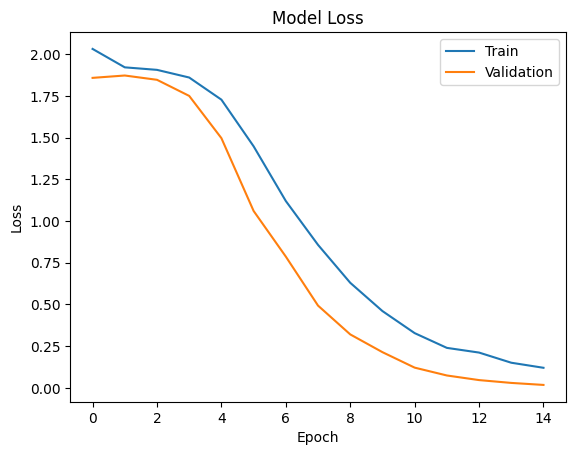

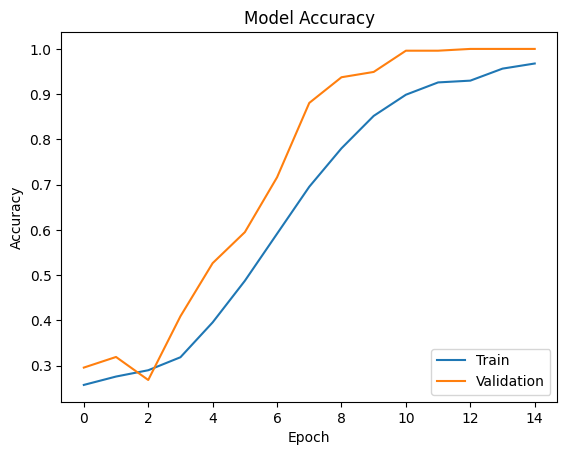

In [26]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıp (loss) değerlerinin grafiği
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Eğitim ve doğrulama doğruluk (accuracy) değerlerinin grafiği
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()